In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from collections import defaultdict, Counter

def format_name(x):
    x_split = x.split(" (")
    return x_split[0] + "_" + x_split[1][:-1]

# CCLE name to Achilles ID mapping

Cell lines can be identified both by a CCLE name (for instance, "HELA_CERVIX") or with an Achilles ID (for instance, "ACH-001086"). For consistency, we will use the Achilles ID.

In [10]:
cell_line_info = pd.read_csv("../data/sample_info.csv")
ccle_achilles_map = dict(zip(cell_line_info["CCLE Name"],cell_line_info["DepMap_ID"]))

ccle_achilles_map["451LU_NS"] = ccle_achilles_map["451LU_SKIN"]
ccle_achilles_map["ACN"] = ccle_achilles_map["ACN_AUTONOMIC_GANGLIA"]
ccle_achilles_map["CORL321_PLEURA"] = ccle_achilles_map["CORL321_LUNG"]
ccle_achilles_map["HS940T_SKIN"] = ccle_achilles_map["HS940T_FIBROBLAST"]
ccle_achilles_map["M00921"] = ccle_achilles_map["M00921_SKIN"]
ccle_achilles_map["M1203273"] = ccle_achilles_map["M1203273_SKIN"]
ccle_achilles_map["MCIXC_AUTONOMIC_GANGLIA"] = ccle_achilles_map["MCIXC_BONE"]
ccle_achilles_map["MET2B"] = ccle_achilles_map["MET2B_SKIN"]
ccle_achilles_map["RF48_STOMACH"] = ccle_achilles_map["RF48_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"]
ccle_achilles_map["RH1_SOFT_TISSUE"] = ccle_achilles_map["RH1_BONE"]
ccle_achilles_map["S117_SOFT_TISSUE"] = ccle_achilles_map["S117_THYROID"]
ccle_achilles_map["SKN_URINARY_TRACT"] = ccle_achilles_map["SKN_ENDOMETRIUM"]
ccle_achilles_map["SW13_ADRENAL_GLAND"] = ccle_achilles_map["SW13_ADRENAL_CORTEX"]
ccle_achilles_map["SW626_OVARY"] = ccle_achilles_map["SW626_LARGE_INTESTINE"]
ccle_achilles_map["SW954_VULVA"] = ccle_achilles_map["SW954_CERVIX"]
ccle_achilles_map["TASK1_BONE"] = ccle_achilles_map["TASK1_CENTRAL_NERVOUS_SYSTEM"]
ccle_achilles_map["WM793B_SKIN"] = ccle_achilles_map["WM793_SKIN"]
ccle_achilles_map["HS751T_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"] = ccle_achilles_map["HS751T_FIBROBLAST"]
ccle_achilles_map["HS604T_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"] = ccle_achilles_map["HS604T_FIBROBLAST"]
ccle_achilles_map["HS274T_BREAST"] = ccle_achilles_map["HS274T_FIBROBLAST"]
ccle_achilles_map["AZ521_STOMACH"] = ccle_achilles_map["AZ521_SMALL_INTESTINE"]
ccle_achilles_map["HS895T_SKIN"] = ccle_achilles_map["HS895T_FIBROBLAST"]
ccle_achilles_map["T173_BONE"] = ccle_achilles_map["T173_FIBROBLAST"]
ccle_achilles_map["HS870T_BONE"] = ccle_achilles_map["HS870T_FIBROBLAST"]
ccle_achilles_map["HS255T_LARGE_INTESTINE"] = ccle_achilles_map["HS255T_FIBROBLAST"]
ccle_achilles_map["HS675T_LARGE_INTESTINE"] = ccle_achilles_map["HS675T_FIBROBLAST"]
ccle_achilles_map["HS839T_SKIN"] = ccle_achilles_map["HS839T_FIBROBLAST"]
ccle_achilles_map["HS819T_BONE"] = ccle_achilles_map["HS819T_FIBROBLAST"]
ccle_achilles_map["TO175T_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"] = ccle_achilles_map["TO175T_FIBROBLAST"]
ccle_achilles_map["HS840T_UPPER_AERODIGESTIVE_TRACT"] = ccle_achilles_map["HS840T_FIBROBLAST"]
ccle_achilles_map["HS229T_LUNG"] = ccle_achilles_map["HS229T_FIBROBLAST"]
ccle_achilles_map["HS616T_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"] = ccle_achilles_map["HS616T_FIBROBLAST"]
ccle_achilles_map["HS600T_SKIN"] = ccle_achilles_map["HS600T_FIBROBLAST"]
ccle_achilles_map["TE159T_SOFT_TISSUE"] = ccle_achilles_map["TE159T_FIBROBLAST"]
ccle_achilles_map["HLFA_LUNG"] = ccle_achilles_map["HLFA_FIBROBLAST"]
ccle_achilles_map["HS606T_BREAST"] = ccle_achilles_map["HS606T_FIBROBLAST"]
ccle_achilles_map["RS5_PLEURA"] = ccle_achilles_map["RS5_FIBROBLAST"]
ccle_achilles_map["HS834T_SKIN"] = ccle_achilles_map["HS834T_FIBROBLAST"]
ccle_achilles_map["TE125T_SOFT_TISSUE"] = ccle_achilles_map["TE125T_FIBROBLAST"]
ccle_achilles_map["HS281T_BREAST"] = ccle_achilles_map["HS281T_FIBROBLAST"]
ccle_achilles_map["HS863T_BONE"] = ccle_achilles_map["HS863T_FIBROBLAST"]
ccle_achilles_map["HS343T_BREAST"] = ccle_achilles_map["HS343T_FIBROBLAST"]
ccle_achilles_map["HS888T_BONE"] = ccle_achilles_map["HS888T_FIBROBLAST"]
ccle_achilles_map["HS739T_BREAST"] = ccle_achilles_map["HS739T_FIBROBLAST"]
ccle_achilles_map["X5637_URINARY_TRACT"] = ccle_achilles_map["5637_URINARY_TRACT"]
ccle_achilles_map["HS618T_LUNG"] = ccle_achilles_map["HS618T_FIBROBLAST"]
ccle_achilles_map["HS742T_BREAST"] = ccle_achilles_map["HS742T_FIBROBLAST"]
ccle_achilles_map["X59M_OVARY"] = ccle_achilles_map["59M_OVARY"]
ccle_achilles_map["ALEXANDERCELLS_LIVER"] = ccle_achilles_map["PLCPRF5_LIVER"]
ccle_achilles_map["HS688AT_SKIN"] = ccle_achilles_map["HS688AT_FIBROBLAST"]
ccle_achilles_map["HS822T_BONE"] = ccle_achilles_map["HS822T_FIBROBLAST"]
ccle_achilles_map["HS737T_BONE"] = ccle_achilles_map["HS737T_FIBROBLAST"]
ccle_achilles_map["X143B_BONE"] = ccle_achilles_map["143B_BONE"]
ccle_achilles_map["X769P_KIDNEY"] = ccle_achilles_map["769P_KIDNEY"]
ccle_achilles_map["X786O_KIDNEY"] = ccle_achilles_map["786O_KIDNEY"]
ccle_achilles_map["X42MGBA_CENTRAL_NERVOUS_SYSTEM"] = ccle_achilles_map["42MGBA_CENTRAL_NERVOUS_SYSTEM"]
ccle_achilles_map["X1321N1_CENTRAL_NERVOUS_SYSTEM"] = ccle_achilles_map["1321N1_CENTRAL_NERVOUS_SYSTEM"]
ccle_achilles_map["X8MGBA_CENTRAL_NERVOUS_SYSTEM"] = ccle_achilles_map["8MGBA_CENTRAL_NERVOUS_SYSTEM"]
ccle_achilles_map["X22RV1_PROSTATE"] = ccle_achilles_map["22RV1_PROSTATE"]
ccle_achilles_map["BJHTERT_SKIN"] = ccle_achilles_map["BJHTERT_FIBROBLAST"]
ccle_achilles_map["TIG3TD_LUNG"] = ccle_achilles_map["TIG3TD_FIBROBLAST"]
ccle_achilles_map["HS172T_URINARY_TRACT"] = ccle_achilles_map["HS172T_FIBROBLAST"]
ccle_achilles_map["X8305C_THYROID"] = ccle_achilles_map["8305C_THYROID"]
ccle_achilles_map["DM3_PLEURA"] = ccle_achilles_map["DM3_FIBROBLAST"]
ccle_achilles_map["HS698T_LARGE_INTESTINE"] = ccle_achilles_map["HS698T_FIBROBLAST"]
ccle_achilles_map["HS934T_SKIN"] = ccle_achilles_map["HS934T_FIBROBLAST"]
ccle_achilles_map["HS821T_BONE"] = ccle_achilles_map["HS821T_FIBROBLAST"]
ccle_achilles_map["X8505C_THYROID"] = ccle_achilles_map["8505C_THYROID"]
ccle_achilles_map["X697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"] = ccle_achilles_map["697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"]
ccle_achilles_map["X2313287_STOMACH"] = ccle_achilles_map["2313287_STOMACH"]
ccle_achilles_map["X639V_URINARY_TRACT"] = ccle_achilles_map["639V_URINARY_TRACT"]
ccle_achilles_map["X647V_URINARY_TRACT"] = ccle_achilles_map["647V_URINARY_TRACT"]
ccle_achilles_map["GISTT1_GASTROINTESTINAL_TRACT"] = ccle_achilles_map["GISTT1_STOMACH"]
ccle_achilles_map["93T449_SOFT_TISSUE"] = "ACH-001794"
ccle_achilles_map['95T1000_SOFT_TISSUE'] = "ACH-001796"
ccle_achilles_map['C396_BONE'] = "ACH-001818"
ccle_achilles_map['CCLP1_BILIARY_TRACT'] = "ACH-001959"
ccle_achilles_map['CCSW1_BILIARY_TRACT'] = "ACH-001960"
ccle_achilles_map['CII_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'] = "ACH-001484"
ccle_achilles_map['H357_UPPER_AERODIGESTIVE_TRACT'] = "ACH-001509"
ccle_achilles_map['HB1119_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'] = "ACH-001736"
ccle_achilles_map['ICC108_BILIARY_TRACT'] = 'ACH-001836'
ccle_achilles_map['ICC12_BILIARY_TRACT'] = "ACH-001838"
ccle_achilles_map['ICC2_BILIARY_TRACT'] = "ACH-001842"
ccle_achilles_map['ICC8_BILIARY_TRACT'] = "ACH-001848"
ccle_achilles_map['ICC9_BILIARY_TRACT'] = "ACH-001849"
ccle_achilles_map['KE97_STOMACH'] = "ACH-000167"
ccle_achilles_map['LPS27_SOFT_TISSUE'] = "ACH-001793"
ccle_achilles_map['LPS6_SOFT_TISSUE'] = "ACH-001791"
ccle_achilles_map['LS_AUTONOMIC_GANGLIA'] = "ACH-001548"
ccle_achilles_map['NCIH684_LARGE_INTESTINE'] = "ACH-000089"
ccle_achilles_map['NGP_AUTONOMIC_GANGLIA'] = "ACH-001366"
ccle_achilles_map['NHAHTDD_PRIMARY'] = "ACH-001142"
ccle_achilles_map['OCIM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'] = "ACH-001618"
ccle_achilles_map['OS252_BONE'] = "ACH-001814"
ccle_achilles_map['ACH-001316'] = "ACH-001316"
ccle_achilles_map['PGA1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'] = "ACH-001634"
ccle_achilles_map['RBE_BILIARY_TRACT'] = "ACH-001856"
ccle_achilles_map['RH18DM_SOFT_TISSUE'] = "ACH-001790"
ccle_achilles_map['SEMK2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'] = "ACH-001735"
ccle_achilles_map['SG231_BILIARY_TRACT'] = "ACH-001857"
ccle_achilles_map['SHI1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'] = "ACH-001647"
ccle_achilles_map['SNU638_STOMACH'] = "ACH-001664"
ccle_achilles_map['SUSA_TESTIS'] = "ACH-001668"
ccle_achilles_map['WERIRB1_AUTONOMIC_GANGLIA'] = "ACH-001421"
ccle_achilles_map['NCIH684_LIVER'] = ccle_achilles_map["NCIH684_LARGE_INTESTINE"]

# Gencode v19 definitions

The gene expression estimates in the CCLE were computed using the GENCODE v19 definitions. Here we read these in and do some pre-formatting to extract the gene transcripts and ENSEMBL IDs, before saving to an HDF5 file for faster loading.

In [8]:
g19_definitions = pd.read_csv("../data/gencode.v19.genes.v7_model.patched_contigs.gtf.gz",sep="\t",skiprows=6,
                              names=["chrom","source","type","start","end",".1","strand",".2","info"])

# ENSEMBL gene ID
g19_definitions["ensembl_gene_id"] = g19_definitions["info"].apply(
    lambda x: x.split(";")[0][9:-1])

# Gene name (HUGO)
g19_definitions["gene_name"] = g19_definitions["info"].apply(
    lambda x: x.split("gene_name")[1].split(";")[0][2:-1])

# ENSEMBL transcript ID
g19_definitions["ensembl_tx_id"] = g19_definitions["info"].apply(
    lambda x: x.split("transcript_id")[1].split(";")[0][2:-1])

# ENSEMBL name map
ensembl_id_map = dict(zip(g19_gene_definitions["ensembl_gene_id"],g19_gene_definitions["gene_name"]))
ensembl_id_map = defaultdict(str, ensembl_id_map)

# Export to HDF5
g19_definitions.to_hdf("../data/gencode.v19.genes.v7_model.patched_contigs.h5",key="g19_definitions")

/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/pandas/core/generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['chrom', 'source', 'type', '.1', 'strand', '.2', 'info', 'ensembl_gene_id', 'gene_name', 'ensembl_tx_id']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


# RNA-seq

The CCLE includes 1,019 cell lines for which deep RNA-sequencing was performed. These were then used to estimate gene expression, transcript expression, and exon inclusion ratios. Here we load these files and save to HDF5 for faster loading.

## Exon inclusions

In [ ]:
# Change the exon naming scheme
def reorder_exon(exon):
    exon_split = exon.split("_")
    return "_".join(exon_split[3:]) + "_" + "_".join(exon_split[:3])

exonusage = pd.read_csv("raw/ccle/CCLE_RNAseq_ExonUsageRatio_20180929.gct",skiprows=2,index_col=0,sep="\t")
exonusage.index = exonusage.index.map(lambda x:reorder_exon(x))

# Fix inconsistant NaN values
exonusage[exonusage=="\tNA"] = np.nan
exonusage[exonusage=="    NA"] = np.nan
exonusage[exonusage=="     NA"] = np.nan
exonusage = exonusage.astype(float)

# Define columns
exon_ids = pd.Series(exonusage.index,index=exonusage.index) + "_" + pd.Series(exonusage["gene_id"])
exonusage = exonusage.set_index(exon_ids).iloc[:,1:]
exonusage = exonusage.T

# Map CCLE cell line names to Achilles IDs
exonusage.index = exonusage.index.map(lambda x: ccle_achilles_map[x])

# Exon inclusion measurements require that the gene is sufficiently expressed.
# In the interest of space, we only keep exons with less than 800 missing values
exonusage_nans = exonusage.isna().sum(axis=0)
sns.distplot(exonusage_nans)
exonusage = exonusage[exonusage.columns[exonusage_nans<800]]

# We also drop exons with low variability of inclusion (standard deviation less than 0.1)
exonusage_stdevs = exonusage.std(axis=0)
sns.distplot(exonusage_stdevs)
exonusage = exonusage[exonusage.columns[exonusage_stdevs>0.1]]

# Export to HDF5
exonusage.to_hdf("../data/CCLE_RNAseq_ExonUsageRatio_20180929.hdf",key="exonusage")

## Transcript expression

In [ ]:
ccle_transcripts = pd.read_csv("../data/CCLE_RNAseq_rsem_transcripts_tpm_20180929.txt",sep="\t",index_col=1)
ccle_transcripts["gene_id"] = ccle_transcripts["gene_id"].apply(lambda x: ensembl_id_map[x])

# Change the transcript naming format
gene_transcript_ids = ccle_transcripts["gene_id"] + "_" + pd.Series(ccle_transcripts.index,index=ccle_transcripts.index)
ccle_transcripts = ccle_transcripts.set_index(gene_transcript_ids)

# Pseudo-log transform and name mapping
ccle_transcripts = ccle_transcripts.iloc[:,1:]
ccle_transcripts = np.log2(ccle_transcripts+1)
ccle_transcripts = ccle_transcripts.T
ccle_transcripts.index = ccle_transcripts.index.map(lambda x: ccle_achilles_map[x])

# Standard deviation filtering
ccle_transcript_stdevs = ccle_transcripts.std(axis=0)
sns.distplot(ccle_transcript_stdevs)
ccle_transcripts = ccle_transcripts[ccle_transcripts.columns[ccle_transcript_stdevs>0.25]]

# Export to HDF5
ccle_transcripts.to_hdf("../data/CCLE_RNAseq_rsem_transcripts_tpm_20180929.hdf",key="ccle_transcripts")

## Gene expression

In [ ]:
ccle_genex = pd.read_csv("../data/CCLE_RNAseq_rsem_genes_tpm_20180929.txt.gz",sep="\t",index_col=0)

# Drop info columns
ccle_genex = ccle_genex.iloc[:,1:]

# Map ensembl IDs
ccle_gene_names = ccle_genex.index.map(lambda x: ensembl_id_map[x])
gene_names_ids = ccle_gene_names + "_" + pd.Series(ccle_genex.index,index=ccle_genex.index)
ccle_genex = ccle_genex.set_index(gene_names_ids)

# Pseudo-log transform and Achilles name map
ccle_genex = np.log2(ccle_genex+1)
ccle_genex = ccle_genex.T
ccle_genex.index = ccle_genex.index.map(lambda x: ccle_achilles_map[x])

# Export to HDF5
ccle_genex.to_hdf("../data/CCLE_RNAseq_rsem_genes_tpm_20180929.hdf",key="ccle_genex")

# RRBS

The CCLE includes reduced-representation bisulfite sequencing (RRBS) profiling of 843 cell lines, which measures methylation levels at CpG sites across the genome. We aggregated these CpG-level estimates to look at methylation of gene promoter regions, promoter-proximal CpG clusters, and enhancer segments. 

## Promoter regions (1kb ahead of the TSS)

In [ ]:
tss1kb_meth = pd.read_csv("../data/CCLE_RRBS_TSS1kb_20181022.txt.gz",sep="\t",index_col=0)

# Drop info columns
tss1kb_meth = tss1kb_meth.iloc[:-1,2:]
tss1kb_meth = tss1kb_meth.T

# Achilles name map
tss1kb_meth.index = tss1kb_meth.index.map(lambda x: ccle_achilles_map[x])

# Fix inconsistant NaN values
tss1kb_meth[tss1kb_meth=="\tNA"] = np.nan
tss1kb_meth[tss1kb_meth=="    NA"] = np.nan
tss1kb_meth[tss1kb_meth=="     NA"] = np.nan
tss1kb_meth = tss1kb_meth.astype(float)

# Standard deviation filtering
tss1kb_meth_stds = tss1kb_meth.std(axis=0)
sns.distplot(tss1kb_meth_stds)
tss1kb_meth = tss1kb_meth[tss1kb_meth.columns[tss1kb_meth_stds>0.05]]

# Export to HDF5
tss1kb_meth.to_hdf("../data/CCLE_RRBS_TSS1kb_20181022.hdf",key="tss1kb_meth")

## Promoter region clusters

/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


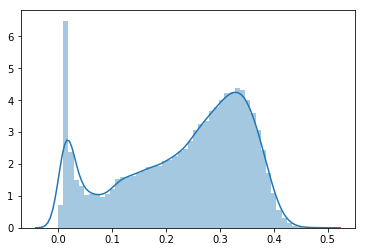

In [11]:
tssclust_meth = pd.read_csv("../data/CCLE_RRBS_tss_CpG_clusters_20181022.txt.gz",sep="\t",index_col=0)

# Drop info columns
tssclust_meth = tssclust_meth.iloc[:-1,2:]
tssclust_meth = tssclust_meth.T

# Achilles name map
tssclust_meth.index = tssclust_meth.index.map(lambda x: ccle_achilles_map[x])

# Fix inconsistant NaN values
tssclust_meth[tssclust_meth=="\tNA"] = np.nan
tssclust_meth[tssclust_meth=="    NA"] = np.nan
tssclust_meth[tssclust_meth=="     NA"] = np.nan
tssclust_meth = tssclust_meth.astype(float)

# Standard deviation filtering
tssclust_meth_stds = tssclust_meth.std(axis=0)
sns.distplot(tssclust_meth_stds)
tssclust_meth = tssclust_meth[tssclust_meth.columns[tssclust_meth_stds>0.05]]

# Export to HDF5
tssclust_meth.to_hdf("../data/CCLE_RRBS_tss_CpG_clusters_20181022.hdf",key="tssclust_meth")

# miRNA profiling

In [ ]:
mirna = pd.read_csv("../data/CCLE_miRNA_20181103.gct.txt",sep="\t",skiprows=2)
mirna.index = mirna["Description"] + "_" + mirna["Name"].apply(lambda x: x[1:])

# Drop info columns and log2-transform
mirna = mirna.iloc[:,2:]
mirna = np.log2(mirna.T)

# Achilles name map
mirna.index = mirna.index.map(lambda x: ccle_achilles_map[x])

# Export to HDF5
mirna.to_hdf("../data/CCLE_miRNA_20181103.hdf",key="mirna")

# RPPA

In [ ]:
rppa = pd.read_csv("../data/CCLE_RPPA_20181003.csv",index_col=0)
rppa.index = rppa.index.map(lambda x: name_mappings.name_map[x])
rppa.to_hdf("../data/CCLE_RPPA_20181003.hdf",key="rppa")

# Chromatin profiling

In [30]:
chromatin_profiling = pd.read_csv("../data/CCLE_GlobalChromatinProfiling_20181130.csv",index_col=1).iloc[:,1:]
chromatin_profiling.to_hdf("../data/CCLE_GlobalChromatinProfiling_20181130.hdf",key="chromatin_profiling")

# Copy number estimates

In [39]:
copynumber = pd.read_csv("../data/CCLE_gene_cn.csv",index_col=0)
copynumber.columns = copynumber.columns.map(lambda x: format_name(x))
copynumber.to_hdf("../data/CCLE_gene_cn.hdf",key="copynumber")

# Mutation profiling

In [10]:
mutation_calls = pd.read_csv("../data/depmap_19Q1_mutation_calls.csv",index_col=0)
mutation_calls.to_hdf("../data/depmap_19Q1_mutation_calls.h5",key="mutation_calls")

/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/pandas/core/generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->['Hugo_Symbol', 'Chromosome', 'Strand', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'dbSNP_RS', 'dbSNP_Val_Status', 'Genome_Change', 'Annotation_Transcript', 'Tumor_Sample_Barcode', 'cDNA_Change', 'Codon_Change', 'Protein_Change', 'isDeleterious', 'isCOSMIChotspot', 'VA_WES_AC', 'CGA_WES_AC', 'SangerWES_AC', 'SangerRecalibWES_AC', 'RNAseq_AC', 'HC_AC', 'RD_AC', 'WGS_AC', 'Variant_annotation', 'DepMap_ID']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [50]:
mutation_calls = pd.read_csv(
    "../data/depmap_19Q1_mutation_calls.csv", index_col=0)

unique_lines = sorted(list(set(mutation_calls["DepMap_ID"])))
unique_lines = pd.Series(index=unique_lines)

damaging_muts = mutation_calls[mutation_calls["Variant_annotation"] == "damaging"]
hs_muts = mutation_calls[(mutation_calls["isCOSMIChotspot"] == True) | (
    mutation_calls["isTCGAhotspot"] == True)]

# Counts of each mutation
damaging_counts = Counter(damaging_muts["Hugo_Symbol"])
hs_counts = Counter(hs_muts["Hugo_Symbol"])

damaging_muts["count"] = damaging_muts["Hugo_Symbol"].apply(
    lambda x: damaging_counts[x])
hs_muts["count"] = hs_muts["Hugo_Symbol"].apply(lambda x: hs_counts[x])

# Keep recurrently mutated genes
damaging_muts = damaging_muts[damaging_muts["count"] >= 1]
hs_muts = hs_muts[hs_muts["count"] >= 1]

damaging_muts["id"] = damaging_muts["Hugo_Symbol"] + \
    "_" + damaging_muts["DepMap_ID"]
hs_muts["id"] = hs_muts["Hugo_Symbol"] + "_" + hs_muts["DepMap_ID"]

# Drop double-mutated instances
damaging_muts = damaging_muts.drop_duplicates(subset=["id"], keep="first")
hs_muts = hs_muts.drop_duplicates(subset=["id"], keep="first")

# Dummy value for pivoting
hs_muts["value"] = 1
damaging_muts["value"] = 1

# Pivot from list of cell lines + mutations to cell lines vs. mutations
hs_mut_mat = pd.pivot_table(hs_muts, values="value",
                            index=["DepMap_ID"], columns="Hugo_Symbol", fill_value=0)
damaging_mut_mat = pd.pivot_table(damaging_muts, values="value",
                                  index=["DepMap_ID"], columns="Hugo_Symbol", fill_value=0)

hs_mut_mat,_ = hs_mut_mat.align(unique_lines,join="right",axis=0)
damaging_mut_mat,_ = damaging_mut_mat.align(unique_lines,join="right",axis=0)

hs_mut_mat = hs_mut_mat.fillna(0)
damaging_mut_mat = damaging_mut_mat.fillna(0)

# Export to HDF5
hs_mut_mat.to_hdf("../data/hs_muts.h5", key="hs_muts")
damaging_mut_mat.to_hdf("../data/damaging_muts.h5", key="damaging_muts")

/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Dependency profiling

## Avana CRISPR-cas9

In [4]:
avana = pd.read_csv("../data/Achilles_gene_effect.csv",index_col=0).T

avana.index = avana.index.map(lambda x: format_name(x))
avana = avana.T

avana.to_hdf("../data/Achilles_gene_effect.hdf",key="avana")

## DRIVE RNAi

In [6]:
drive = pd.read_csv("../data/D2_DRIVE_gene_dep_scores.csv",index_col=0)

drive.index = drive.index.map(lambda x: format_name(x))
drive = drive.T
drive.index = drive.index.map(lambda x: ccle_achilles_map[x])

drive.to_hdf("../data/D2_DRIVE_gene_dep_scores.hdf",key="drive")

## Achilles RNAi

In [7]:
achilles = pd.read_csv("../data/D2_Achilles_gene_dep_scores.csv",index_col=0)

achilles.index = achilles.index.map(lambda x: format_name(x))
achilles = achilles.T
achilles.index = achilles.index.map(lambda x: ccle_achilles_map[x])

achilles.to_hdf("../data/D2_Achilles_gene_dep_scores.hdf",key="achilles")

# Drug response curves

In [ ]:
ctrp = pd.read_csv("../data/CTRPv2.0_2015_ctd2_ExpandedDataset.zip")